# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [5]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [6]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

In [7]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

e:\projects-ideas-codes\PROJECTS\gfg\21d\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [8]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

e:\projects-ideas-codes\PROJECTS\gfg\21d\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [9]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [10]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
Epoch 1/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7756 - loss: 0.6622
Epoch 1: val_loss improved from None to 0.43614, saving model to best_ann_model_weights.weights.h5

Epoch 1: val_loss improved from None to 0.43614, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8215 - loss: 0.5119 - val_accuracy: 0.8411 - val_loss: 0.4361
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8215 - loss: 0.5119 - val_accuracy: 0.8411 - val_loss: 0.4361
Epoch 2/30
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8597 - loss: 0.3835
Epoch 2: val_loss improved from 0.43614 to 0.39647, saving model to best_ann_model_weights.weights.h5

Epoch 2: val_loss improved from 0.43614 to 0.39647, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8627 - loss: 0.3768 - val_accuracy: 0.8589 - val_loss: 0.3965
Epoch 3/30
938/938 ━━━━━━━━━━

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [11]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7497 - loss: 0.7294
Epoch 1: val_loss improved from None to 0.38923, saving model to best_basic_cnn_model_weights.weights.h5

Epoch 1: val_loss improved from None to 0.38923, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8217 - loss: 0.5044 - val_accuracy: 0.8667 - val_loss: 0.3892
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8217 - loss: 0.5044 - val_accuracy: 0.8667 - val_loss: 0.3892
Epoch 2/30
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8748 - loss: 0.3428
Epoch 2: val_loss improved from 0.38923 to 0.32242, saving model to best_basic_cnn_model_weights.weights.h5

Epoch 2: val_loss improved from 0.38923 to 0.32242, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8796 - loss: 0.3326 - val_accuracy: 0.8868 - val_loss

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [12]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
Epoch 1/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6505 - loss: 1.0468
Epoch 1: val_loss improved from None to 0.44031, saving model to best_deeper_cnn_model_weights.weights.h5

Epoch 1: val_loss improved from None to 0.44031, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.7350 - loss: 0.7545 - val_accuracy: 0.8378 - val_loss: 0.4403
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.7350 - loss: 0.7545 - val_accuracy: 0.8378 - val_loss: 0.4403
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8147 - loss: 0.5128
Epoch 2: val_loss improved from 0.44031 to 0.39689, saving model to best_deeper_cnn_model_weights.weights.h5

Epoch 2: val_loss improved from 0.44031 to 0.39689, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8220 - loss: 0.4917 - val_accuracy: 0.8581 - val

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

C:\Users\nitin\AppData\Local\Temp\ipykernel_4748\2215778233.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\projects-ideas-codes\PROJECTS\gfg\21d\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\projects-ideas-codes\PROJECTS\gfg\21d\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


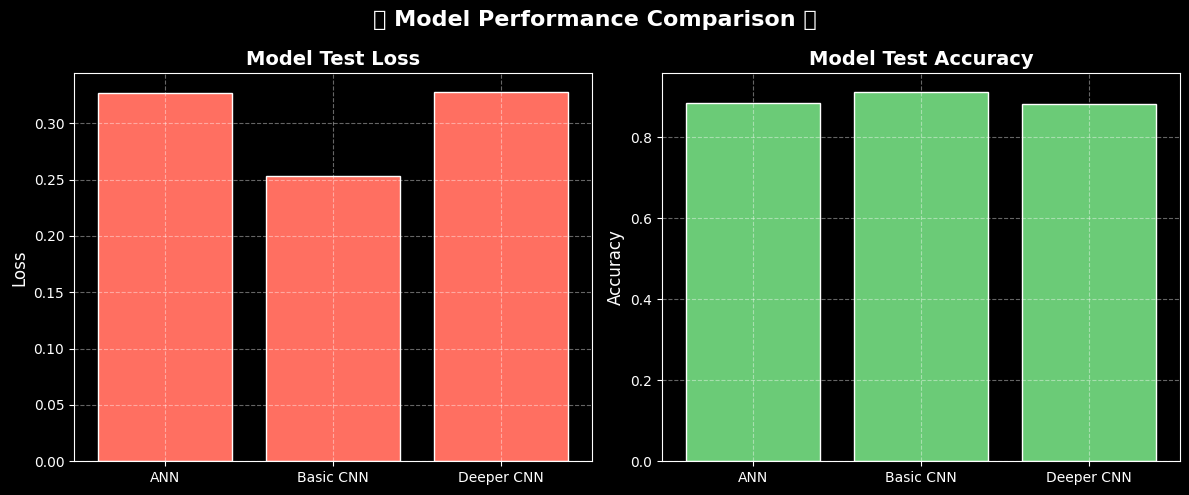

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


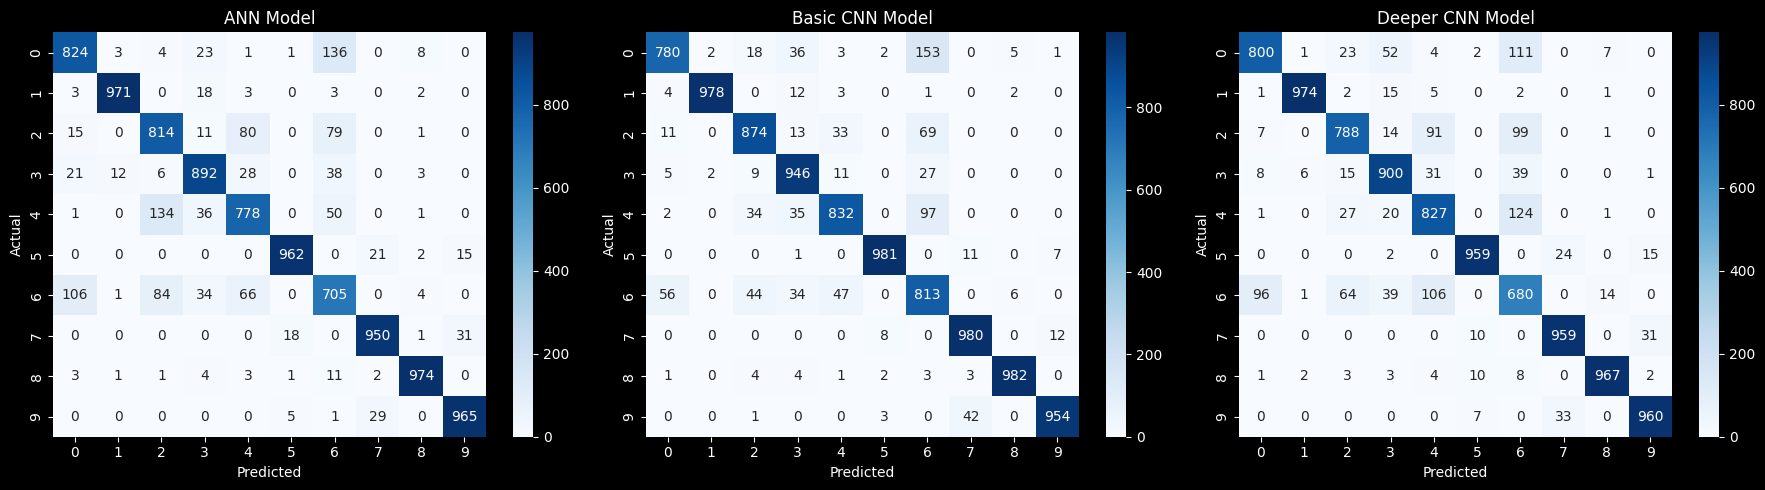

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


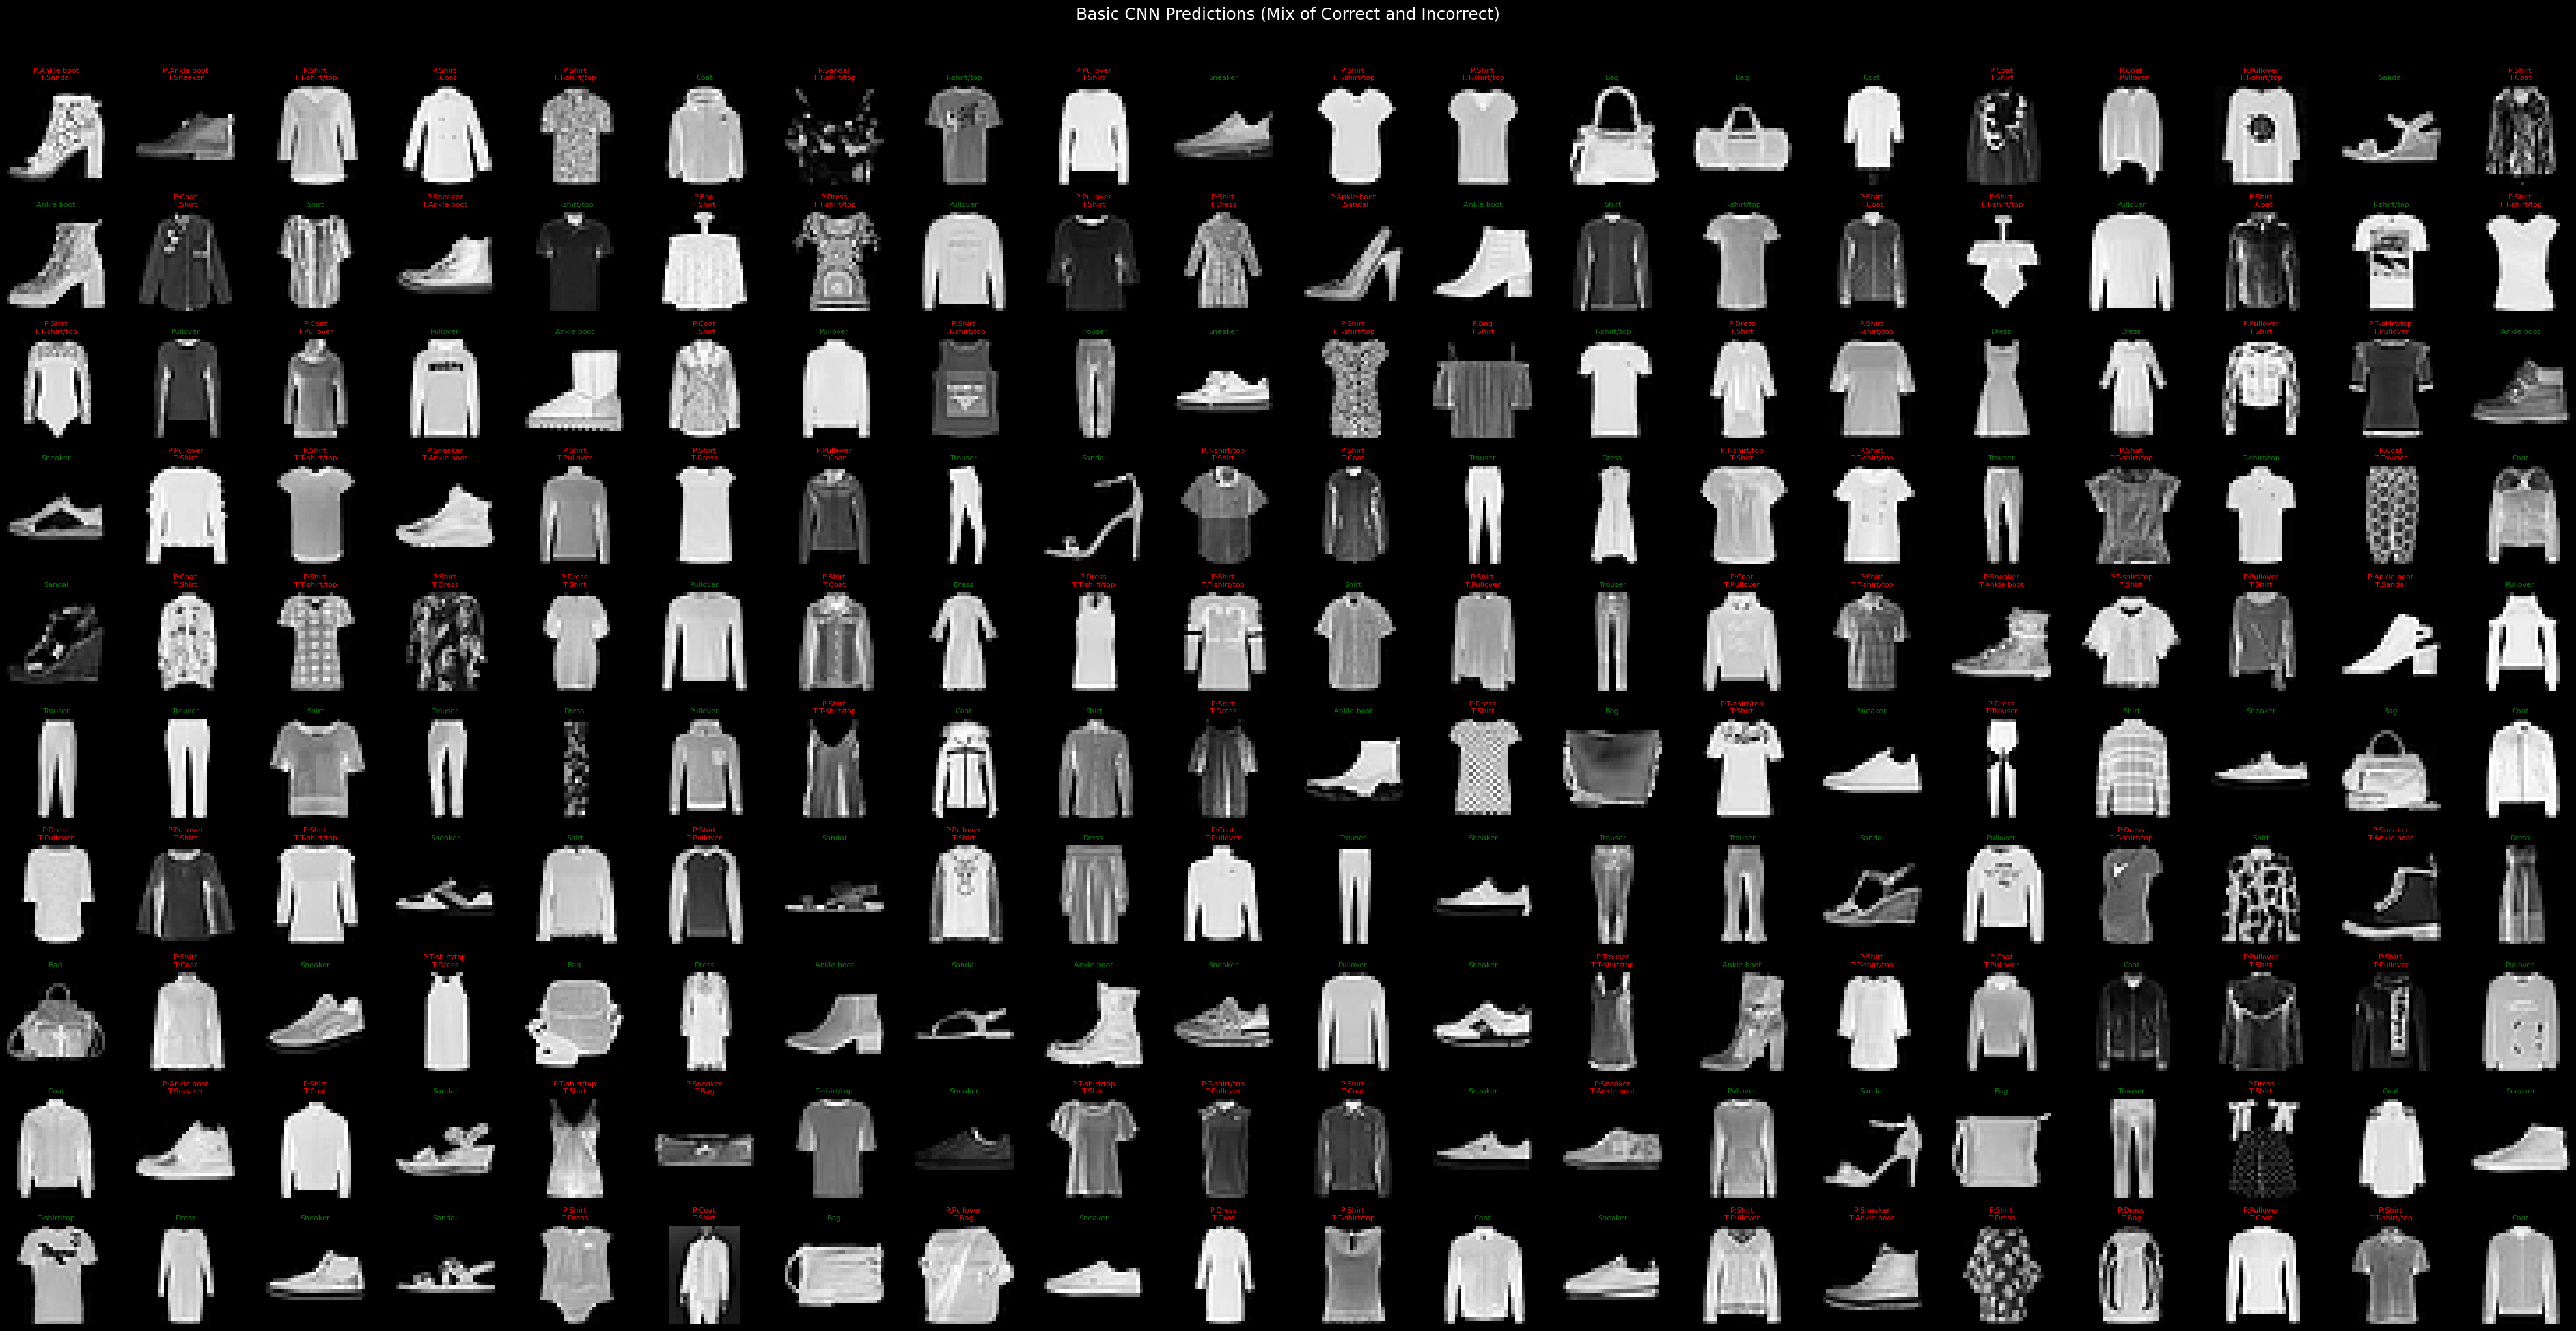

In [16]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

In [17]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("=== CIFAR-100 Dataset Loading ===")
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

print("\nDataset characteristics:")
print(f"Number of training samples: {cifar100_train_images.shape[0]}")
print(f"Number of test samples: {cifar100_test_images.shape[0]}")
print(f"Image dimensions: {cifar100_train_images.shape[1]}x{cifar100_train_images.shape[2]}")
print(f"Number of color channels: {cifar100_train_images.shape[3]}")
print(f"Pixel value range: {cifar100_train_images.min()} to {cifar100_train_images.max()}")
print(f"Number of classes: {len(np.unique(cifar100_train_labels))}")

# Display unique labels
unique_labels = np.unique(cifar100_train_labels)
print(f"Label range: {unique_labels.min()} to {unique_labels.max()}")

=== CIFAR-100 Dataset Loading ===
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 161s 1us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 161s 1us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)

Dataset characteristics:
Number of training samples: 50000
Number of test samples: 10000
Image dimensions: 32x32
Number of color channels: 3
Pixel value range: 0 to 255
Number of classes: 100
Label range: 0 to 99
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)

Dataset characteristics:
Number of training samples: 50000
Number of test samples: 10000
Image dimensions: 32x32
Number of color channels: 3
Pixel value range: 0 to 255
Number of classes: 100
Label range: 0 to 99


=== CIFAR-100 Class Distribution ===
Each class has 500 training samples (should be 500 for CIFAR-100)

=== Sample Images from CIFAR-100 ===


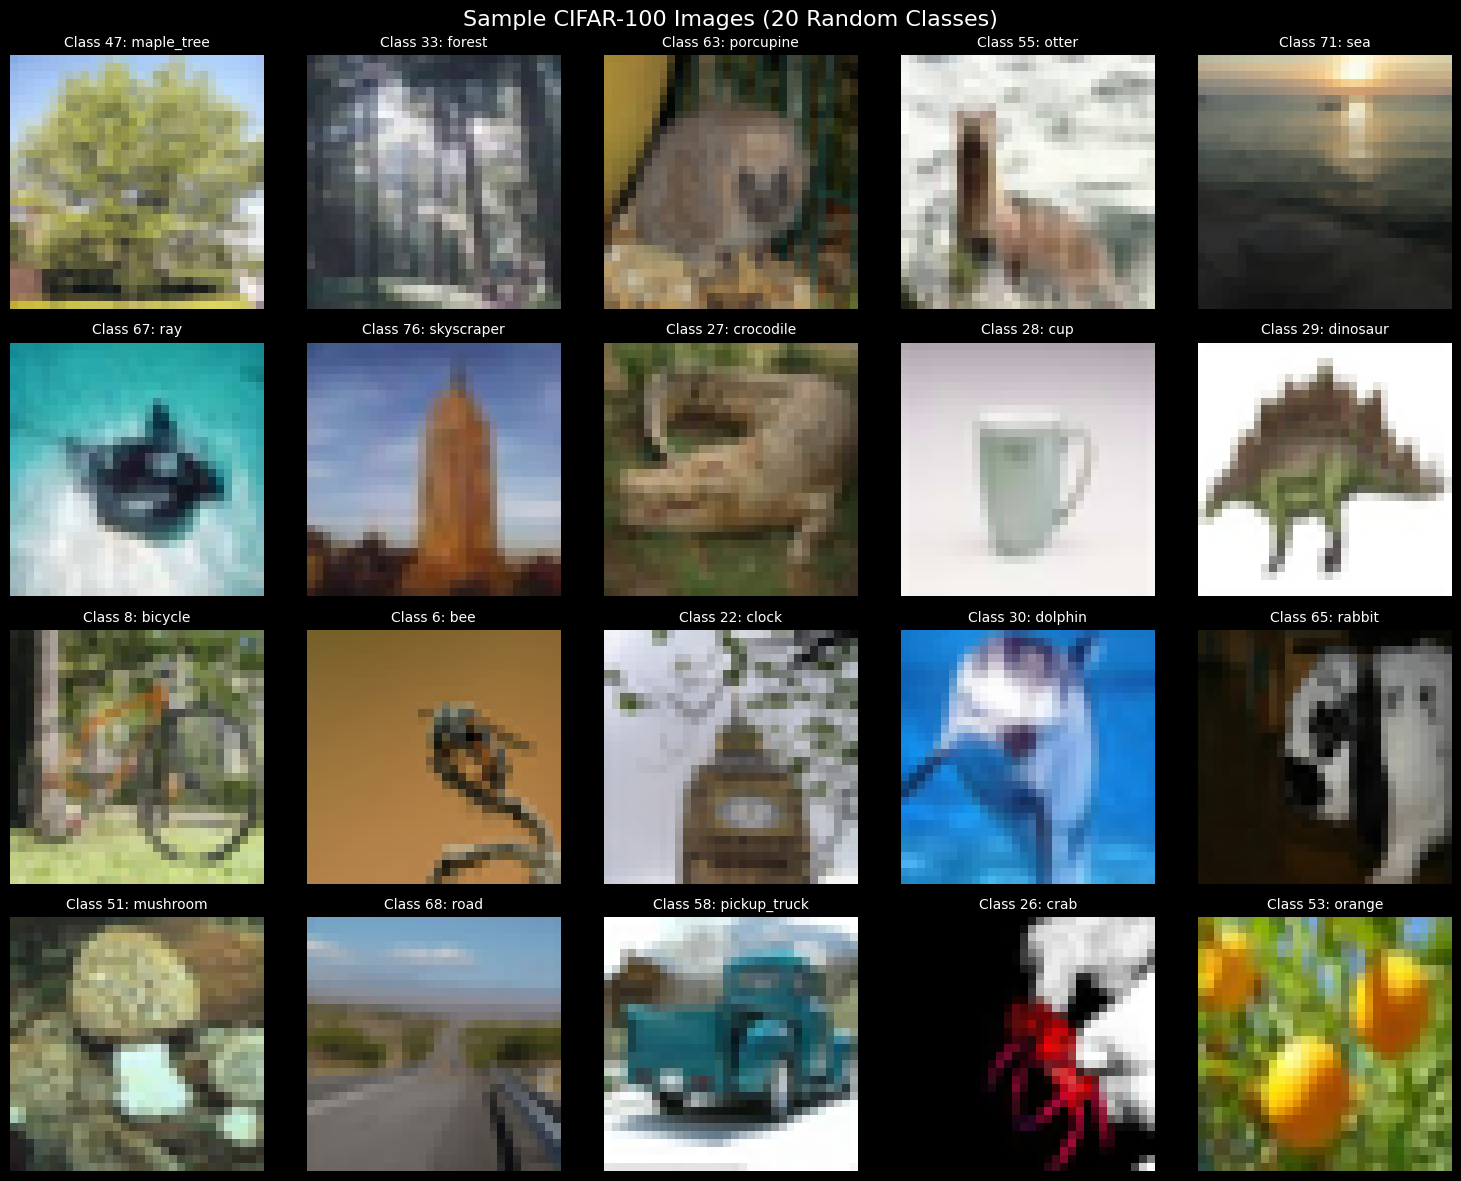

In [18]:
# CIFAR-100 class names (100 fine labels)
cifar100_class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

print("=== CIFAR-100 Class Distribution ===")
# Check class distribution
unique_labels, counts = np.unique(cifar100_train_labels, return_counts=True)
print(f"Each class has {counts[0]} training samples (should be 500 for CIFAR-100)")

# Display sample images from different classes
print("\n=== Sample Images from CIFAR-100 ===")
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle("Sample CIFAR-100 Images (20 Random Classes)", fontsize=16)

# Select 20 random classes to display
random_classes = np.random.choice(100, 20, replace=False)

for i, class_id in enumerate(random_classes):
    row = i // 5
    col = i % 5
    
    # Find first image of this class
    class_indices = np.where(cifar100_train_labels.flatten() == class_id)[0]
    img_idx = class_indices[0]
    
    axes[row, col].imshow(cifar100_train_images[img_idx])
    axes[row, col].set_title(f"Class {class_id}: {cifar100_class_names[class_id]}", fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### 1.1) Data Preprocessing

**Key differences from Fashion-MNIST:**
- **Image size**: 32x32 pixels (vs 28x28)
- **Color channels**: 3 channels RGB (vs 1 grayscale) 
- **Number of classes**: 100 classes (vs 10)
- **Input shape**: (32, 32, 3) instead of (28, 28, 1)
- **Complexity**: Much more challenging dataset with varied natural images

=== CIFAR-100 Data Preprocessing ===
After normalization:
Training images pixel range: 0.000 to 1.000
Test images pixel range: 0.000 to 1.000

Label encoding:
Original label shape: (50000, 1)
One-hot label shape: (50000, 100)
Number of classes: 100

=== Final Processed Data Shapes ===
Training images: (50000, 32, 32, 3)
Training labels: (50000, 100)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 100)

=== Preprocessing Example ===
Original label: 19
One-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Class name: cattle
After normalization:
Training images pixel range: 0.000 to 1.000
Test images pixel range: 0.000 to 1.000

Label encoding:
Original label shape: (50000, 1)
One-hot label shape: (50000, 100)
Num

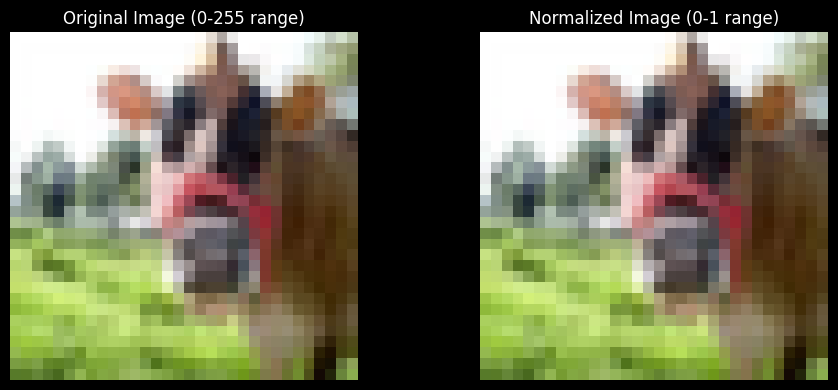

In [19]:
print("=== CIFAR-100 Data Preprocessing ===")

# Normalize pixel values to [0, 1] range
cifar100_train_images_normalized = cifar100_train_images.astype('float32') / 255.0
cifar100_test_images_normalized = cifar100_test_images.astype('float32') / 255.0

print("After normalization:")
print(f"Training images pixel range: {cifar100_train_images_normalized.min():.3f} to {cifar100_train_images_normalized.max():.3f}")
print(f"Test images pixel range: {cifar100_test_images_normalized.min():.3f} to {cifar100_test_images_normalized.max():.3f}")

# One-hot encode labels (100 classes for CIFAR-100)
from tensorflow.keras.utils import to_categorical

cifar100_train_labels_one_hot = to_categorical(cifar100_train_labels, 100)
cifar100_test_labels_one_hot = to_categorical(cifar100_test_labels, 100)

print("\nLabel encoding:")
print(f"Original label shape: {cifar100_train_labels.shape}")
print(f"One-hot label shape: {cifar100_train_labels_one_hot.shape}")
print(f"Number of classes: {cifar100_train_labels_one_hot.shape[1]}")

# Verify shapes
print("\n=== Final Processed Data Shapes ===")
print(f"Training images: {cifar100_train_images_normalized.shape}")
print(f"Training labels: {cifar100_train_labels_one_hot.shape}")
print(f"Test images: {cifar100_test_images_normalized.shape}")
print(f"Test labels: {cifar100_test_labels_one_hot.shape}")

# Show example of preprocessing
print("\n=== Preprocessing Example ===")
print("Original label:", cifar100_train_labels[0][0])
print("One-hot encoded label:", cifar100_train_labels_one_hot[0])
print("Class name:", cifar100_class_names[cifar100_train_labels[0][0]])

# Compare before and after normalization
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(cifar100_train_images[0])
axes[0].set_title('Original Image (0-255 range)')
axes[0].axis('off')

axes[1].imshow(cifar100_train_images_normalized[0])
axes[1].set_title('Normalized Image (0-1 range)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 2. Model Building for CIFAR-100

**Adaptations for CIFAR-100:**
- **Input shape**: Changed from (28, 28, 1) to (32, 32, 3)
- **Output classes**: Changed from 10 to 100 classes
- **Model complexity**: Increased to handle more complex color images
- **Architecture adjustments**: More filters and potentially deeper networks due to dataset complexity

### 2.1) ANN Model for CIFAR-100

**Architecture adaptations:**
- **Flatten**: Input (32, 32, 3) → 3072 features (vs 784 for Fashion-MNIST)
- **Dense layers**: Increased units to handle higher complexity
- **Output**: 100 classes instead of 10
- **Total parameters**: Significantly higher due to input size and classes

In [20]:
print("=== Building ANN Model for CIFAR-100 ===")

cifar100_ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # 32*32*3 = 3072 features
    keras.layers.Dense(256, activation='relu'),     # Increased from 128
    keras.layers.Dropout(0.3),                     # Added dropout for regularization
    keras.layers.Dense(128, activation='relu'),    # Increased from 64
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

cifar100_ann_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

print("CIFAR-100 ANN Model Summary:")
cifar100_ann_model.summary()

# Calculate parameter count
total_params = cifar100_ann_model.count_params()
print(f"\nTotal parameters: {total_params:,}")
print(f"Input features: 32×32×3 = {32*32*3} (vs Fashion-MNIST: 28×28×1 = {28*28*1})")
print(f"Output classes: 100 (vs Fashion-MNIST: 10)")

=== Building ANN Model for CIFAR-100 ===
CIFAR-100 ANN Model Summary:


e:\projects-ideas-codes\PROJECTS\gfg\21d\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,484 (3.18 MB)

 Trainable params: 832,484 (3.18 MB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 832,484
Input features: 32×32×3 = 3072 (vs Fashion-MNIST: 28×28×1 = 784)
Output classes: 100 (vs Fashion-MNIST: 10)


### 2.2) Basic CNN Model for CIFAR-100

**Architecture adaptations:**
- **Input shape**: (32, 32, 3) for color images
- **Conv2D layers**: More filters to handle color complexity
- **Output**: 100 classes
- **Regularization**: Added dropout to prevent overfitting on complex dataset

In [21]:
print("=== Building Basic CNN Model for CIFAR-100 ===")

cifar100_basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Additional conv layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),                          # Added dropout
    keras.layers.Dense(100, activation='softmax')       # 100 classes
])

cifar100_basic_cnn_model.compile(optimizer='adam',
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

print("CIFAR-100 Basic CNN Model Summary:")
cifar100_basic_cnn_model.summary()

total_params = cifar100_basic_cnn_model.count_params()
print(f"\nTotal parameters: {total_params:,}")
print("Key differences from Fashion-MNIST Basic CNN:")
print("- Input shape: (32,32,3) vs (28,28,1)")
print("- Additional Conv2D layer for complexity")
print("- Dropout for regularization")
print("- 100 output classes vs 10")

=== Building Basic CNN Model for CIFAR-100 ===
CIFAR-100 Basic CNN Model Summary:


e:\projects-ideas-codes\PROJECTS\gfg\21d\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 368,420
Key differences from Fashion-MNIST Basic CNN:
- Input shape: (32,32,3) vs (28,28,1)
- Additional Conv2D layer for complexity
- Dropout for regularization
- 100 output classes vs 10


### 2.3) Deeper CNN Model for CIFAR-100

**Architecture adaptations:**
- **Multiple Conv2D blocks**: More layers to capture complex features
- **Batch Normalization**: Added after each conv layer for stable training
- **Progressive filters**: 32 → 64 → 128 → 256 filters
- **Higher dropout**: Increased regularization for complex model
- **Optimized for CIFAR-100 complexity**

In [26]:
print("=== Building Deeper CNN Model for CIFAR-100 ===")

cifar100_deeper_cnn_model = keras.Sequential([
    # First convolutional block
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    
    # Second convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    
    # Third convolutional block
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    
    # Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')  # 100 classes
])

cifar100_deeper_cnn_model.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

print("CIFAR-100 Deeper CNN Model Summary:")
cifar100_deeper_cnn_model.summary()

total_params = cifar100_deeper_cnn_model.count_params()
print(f"\nTotal parameters: {total_params:,}")
print("Key features of Deeper CNN for CIFAR-100:")
print("- 6 Conv2D layers with batch normalization")
print("- Progressive filter increase: 32→64→128")
print("- Multiple dropout layers for regularization")
print("- Designed for complex color image classification")

=== Building Deeper CNN Model for CIFAR-100 ===


e:\projects-ideas-codes\PROJECTS\gfg\21d\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



CIFAR-100 Deeper CNN Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 859,268 (3.28 MB)

 Trainable params: 858,308 (3.27 MB)

 Non-trainable params: 960 (3.75 KB)


Total parameters: 859,268
Key features of Deeper CNN for CIFAR-100:
- 6 Conv2D layers with batch normalization
- Progressive filter increase: 32→64→128
- Multiple dropout layers for regularization
- Designed for complex color image classification


## 3. Model Training for CIFAR-100

**Training Configuration:**
- **Epochs**: Up to 50 (more than Fashion-MNIST due to complexity)
- **Batch size**: 64 (same as Fashion-MNIST)
- **Early Stopping**: patience=7 (increased for CIFAR-100)
- **Callbacks**: EarlyStopping + ModelCheckpoint
- **Validation**: Using test set for consistency with Fashion-MNIST approach

### 3.1) Training ANN Model

**Configuration adapted for CIFAR-100:**
- **Increased patience**: 7 epochs (vs 5 for Fashion-MNIST)
- **More epochs**: 50 (vs 30) due to dataset complexity
- **Same batch size**: 64 for consistency

In [27]:
print("=== Setting up Training Callbacks for CIFAR-100 ===")

# Early stopping with increased patience for CIFAR-100
early_stopping_cifar100 = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,  # Increased from 5 due to CIFAR-100 complexity
    restore_best_weights=True,
    verbose=1
)

# Model checkpoint for ANN
model_checkpoint_cifar100_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CIFAR-100 ANN model...")
print("This may take several minutes due to increased complexity...")

cifar100_ann_history = cifar100_ann_model.fit(
    cifar100_train_images_normalized,
    cifar100_train_labels_one_hot,
    epochs=50,  # Increased from 30 for CIFAR-100
    batch_size=64,
    validation_data=(cifar100_test_images_normalized, cifar100_test_labels_one_hot),
    callbacks=[early_stopping_cifar100, model_checkpoint_cifar100_ann],
    verbose=1
)

print("CIFAR-100 ANN model training completed!")
print(f"Training stopped at epoch: {len(cifar100_ann_history.history['loss'])}")
print(f"Best validation loss: {min(cifar100_ann_history.history['val_loss']):.4f}")
print(f"Best validation accuracy: {max(cifar100_ann_history.history['val_accuracy']):.4f}")

=== Setting up Training Callbacks for CIFAR-100 ===
Training CIFAR-100 ANN model...
This may take several minutes due to increased complexity...
Epoch 1/50
Epoch 1/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0901 - loss: 3.9177
Epoch 1: val_loss improved from None to 3.86057, saving model to best_cifar100_ann_model_weights.weights.h5

Epoch 1: val_loss improved from None to 3.86057, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0909 - loss: 3.9175 - val_accuracy: 0.1192 - val_loss: 3.8606
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0909 - loss: 3.9175 - val_accuracy: 0.1192 - val_loss: 3.8606
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0925 - loss: 3.9197
Epoch 2: val_loss improved from 3.86057 to 3.83763, saving model to best_cifar100_ann_model_weights.weights.h5

Epoch 2: val_loss improved from 3.86057 to 3.83763, saving model to best_cifar100_ann_model_

### 3.2) Training Basic CNN Model

In [28]:
# Model checkpoint for Basic CNN
model_checkpoint_cifar100_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CIFAR-100 Basic CNN model...")
print("Expected to perform better than ANN on complex image data...")

cifar100_basic_cnn_history = cifar100_basic_cnn_model.fit(
    cifar100_train_images_normalized,
    cifar100_train_labels_one_hot,
    epochs=50,
    batch_size=64,
    validation_data=(cifar100_test_images_normalized, cifar100_test_labels_one_hot),
    callbacks=[early_stopping_cifar100, model_checkpoint_cifar100_basic_cnn],
    verbose=1
)

print("CIFAR-100 Basic CNN model training completed!")
print(f"Training stopped at epoch: {len(cifar100_basic_cnn_history.history['loss'])}")
print(f"Best validation loss: {min(cifar100_basic_cnn_history.history['val_loss']):.4f}")
print(f"Best validation accuracy: {max(cifar100_basic_cnn_history.history['val_accuracy']):.4f}")

Training CIFAR-100 Basic CNN model...
Expected to perform better than ANN on complex image data...
Epoch 1/50
Epoch 1/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4028 - loss: 2.2019
Epoch 1: val_loss improved from None to 2.43322, saving model to best_cifar100_basic_cnn_model_weights.weights.h5

Epoch 1: val_loss improved from None to 2.43322, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.4008 - loss: 2.2106 - val_accuracy: 0.3873 - val_loss: 2.4332
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.4008 - loss: 2.2106 - val_accuracy: 0.3873 - val_loss: 2.4332
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4150 - loss: 2.1409
Epoch 2: val_loss improved from 2.43322 to 2.42680, saving model to best_cifar100_basic_cnn_model_weights.weights.h5

Epoch 2: val_loss improved from 2.43322 to 2.42680, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782

### 3.3) Training Deeper CNN Model

In [29]:
# Model checkpoint for Deeper CNN
model_checkpoint_cifar100_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CIFAR-100 Deeper CNN model...")
print("This model has the highest complexity and may take the longest to train...")

cifar100_deeper_cnn_history = cifar100_deeper_cnn_model.fit(
    cifar100_train_images_normalized,
    cifar100_train_labels_one_hot,
    epochs=50,
    batch_size=64,
    validation_data=(cifar100_test_images_normalized, cifar100_test_labels_one_hot),
    callbacks=[early_stopping_cifar100, model_checkpoint_cifar100_deeper_cnn],
    verbose=1
)

print("CIFAR-100 Deeper CNN model training completed!")
print(f"Training stopped at epoch: {len(cifar100_deeper_cnn_history.history['loss'])}")
print(f"Best validation loss: {min(cifar100_deeper_cnn_history.history['val_loss']):.4f}")
print(f"Best validation accuracy: {max(cifar100_deeper_cnn_history.history['val_accuracy']):.4f}")

print("\n=== CIFAR-100 Training Summary ===")
models_summary = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Epochs Trained': [
        len(cifar100_ann_history.history['loss']),
        len(cifar100_basic_cnn_history.history['loss']),
        len(cifar100_deeper_cnn_history.history['loss'])
    ],
    'Best Val Accuracy': [
        max(cifar100_ann_history.history['val_accuracy']),
        max(cifar100_basic_cnn_history.history['val_accuracy']),
        max(cifar100_deeper_cnn_history.history['val_accuracy'])
    ],
    'Best Val Loss': [
        min(cifar100_ann_history.history['val_loss']),
        min(cifar100_basic_cnn_history.history['val_loss']),
        min(cifar100_deeper_cnn_history.history['val_loss'])
    ]
}

training_summary_df = pd.DataFrame(models_summary)
print(training_summary_df)

Training CIFAR-100 Deeper CNN model...
This model has the highest complexity and may take the longest to train...
Epoch 1/50
Epoch 1/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.0303 - loss: 4.7071
Epoch 1: val_loss improved from None to 3.91161, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5

Epoch 1: val_loss improved from None to 3.91161, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 113ms/step - accuracy: 0.0476 - loss: 4.3837 - val_accuracy: 0.0987 - val_loss: 3.9116
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 113ms/step - accuracy: 0.0476 - loss: 4.3837 - val_accuracy: 0.0987 - val_loss: 3.9116
Epoch 2/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.0984 - loss: 3.8669
Epoch 2: val_loss improved from 3.91161 to 3.33062, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5

Epoch 2: val_loss improved from 3.91161 to 3.33062, saving model to best_cifar100_deeper_cnn_model

## 4. Model Evaluation for CIFAR-100

**Evaluation Strategy:**
- **Test set evaluation**: Final performance on unseen CIFAR-100 test data
- **Confusion matrices**: 100x100 matrices (vs 10x10 for Fashion-MNIST)
- **Training history visualization**: Compare learning curves
- **Performance comparison**: Loss and accuracy metrics across all models

### 4.1) Model Performance Evaluation

In [30]:
print("=== Evaluating CIFAR-100 Models on Test Set ===")

# Evaluate ANN model
loss_cifar100_ann, accuracy_cifar100_ann = cifar100_ann_model.evaluate(
    cifar100_test_images_normalized, 
    cifar100_test_labels_one_hot, 
    verbose=0
)

# Evaluate Basic CNN model
loss_cifar100_basic_cnn, accuracy_cifar100_basic_cnn = cifar100_basic_cnn_model.evaluate(
    cifar100_test_images_normalized, 
    cifar100_test_labels_one_hot, 
    verbose=0
)

# Evaluate Deeper CNN model
loss_cifar100_deeper_cnn, accuracy_cifar100_deeper_cnn = cifar100_deeper_cnn_model.evaluate(
    cifar100_test_images_normalized, 
    cifar100_test_labels_one_hot, 
    verbose=0
)

print("CIFAR-100 Test Set Performance:")
print("=" * 50)
print(f"ANN Model:")
print(f"  Test Loss: {loss_cifar100_ann:.4f}")
print(f"  Test Accuracy: {accuracy_cifar100_ann:.4f} ({accuracy_cifar100_ann*100:.2f}%)")

print(f"\nBasic CNN Model:")
print(f"  Test Loss: {loss_cifar100_basic_cnn:.4f}")
print(f"  Test Accuracy: {accuracy_cifar100_basic_cnn:.4f} ({accuracy_cifar100_basic_cnn*100:.2f}%)")

print(f"\nDeeper CNN Model:")
print(f"  Test Loss: {loss_cifar100_deeper_cnn:.4f}")
print(f"  Test Accuracy: {accuracy_cifar100_deeper_cnn:.4f} ({accuracy_cifar100_deeper_cnn*100:.2f}%)")

# Find best performing model
accuracies = [accuracy_cifar100_ann, accuracy_cifar100_basic_cnn, accuracy_cifar100_deeper_cnn]
model_names = ['ANN', 'Basic CNN', 'Deeper CNN']
best_model_idx = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_idx]

print(f"\n🏆 Best performing model: {best_model_name} with {max(accuracies)*100:.2f}% accuracy")

# Performance comparison with Fashion-MNIST baseline
print(f"\n📊 CIFAR-100 vs Fashion-MNIST Complexity:")
print(f"CIFAR-100 has 100 classes (vs 10 for Fashion-MNIST)")
print(f"Expected lower accuracy due to:")
print(f"  - 10x more classes to distinguish")
print(f"  - More complex color images")
print(f"  - Natural images with more variation")

=== Evaluating CIFAR-100 Models on Test Set ===
CIFAR-100 Test Set Performance:
ANN Model:
  Test Loss: 3.8281
  Test Accuracy: 0.1196 (11.96%)

Basic CNN Model:
  Test Loss: 2.4268
  Test Accuracy: 0.3839 (38.39%)

Deeper CNN Model:
  Test Loss: 3.9116
  Test Accuracy: 0.0987 (9.87%)

🏆 Best performing model: Basic CNN with 38.39% accuracy

📊 CIFAR-100 vs Fashion-MNIST Complexity:
CIFAR-100 has 100 classes (vs 10 for Fashion-MNIST)
Expected lower accuracy due to:
  - 10x more classes to distinguish
  - More complex color images
  - Natural images with more variation
CIFAR-100 Test Set Performance:
ANN Model:
  Test Loss: 3.8281
  Test Accuracy: 0.1196 (11.96%)

Basic CNN Model:
  Test Loss: 2.4268
  Test Accuracy: 0.3839 (38.39%)

Deeper CNN Model:
  Test Loss: 3.9116
  Test Accuracy: 0.0987 (9.87%)

🏆 Best performing model: Basic CNN with 38.39% accuracy

📊 CIFAR-100 vs Fashion-MNIST Complexity:
CIFAR-100 has 100 classes (vs 10 for Fashion-MNIST)
Expected lower accuracy due to:
  - 1

### 4.2) Training History Visualization

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("=== Visualizing CIFAR-100 Training History ===")

# Create performance comparison dataframe
cifar100_performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_cifar100_ann, loss_cifar100_basic_cnn, loss_cifar100_deeper_cnn],
    'Test Accuracy': [accuracy_cifar100_ann, accuracy_cifar100_basic_cnn, accuracy_cifar100_deeper_cnn],
    'Parameters': [
        cifar100_ann_model.count_params(),
        cifar100_basic_cnn_model.count_params(),
        cifar100_deeper_cnn_model.count_params()
    ]
}

cifar100_performance_df = pd.DataFrame(cifar100_performance_data)
print("CIFAR-100 Model Performance Summary:")
print(cifar100_performance_df)

# Training history visualization using Plotly
cifar100_models = {
    "ANN": ("lightblue", cifar100_ann_history),
    "Basic CNN": ("lightgreen", cifar100_basic_cnn_history),
    "Deeper CNN": ("lightcoral", cifar100_deeper_cnn_history)
}

fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=('Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

for name, (color, history) in cifar100_models.items():
    epochs = list(range(1, len(history.history['accuracy']) + 1))
    
    # Training accuracy
    fig.add_trace(go.Scatter(
        x=epochs, y=history.history['accuracy'], 
        mode='lines', name=f'{name} (Train)', 
        line=dict(color=color, dash='solid')
    ), row=1, col=1)
    
    # Validation accuracy
    fig.add_trace(go.Scatter(
        x=epochs, y=history.history['val_accuracy'], 
        mode='lines', name=f'{name} (Val)', 
        line=dict(color=color, dash='dot')
    ), row=1, col=2)
    
    # Training loss
    fig.add_trace(go.Scatter(
        x=epochs, y=history.history['loss'], 
        mode='lines', name=f'{name} (Train)', 
        line=dict(color=color, dash='solid'), 
        showlegend=False
    ), row=2, col=1)
    
    # Validation loss
    fig.add_trace(go.Scatter(
        x=epochs, y=history.history['val_loss'], 
        mode='lines', name=f'{name} (Val)', 
        line=dict(color=color, dash='dot'), 
        showlegend=False
    ), row=2, col=2)

fig.update_layout(
    title_text="CIFAR-100 Models: Training History Comparison",
    height=800,
    width=1000,
    template="plotly_white"
)

fig.update_xaxes(title_text="Epoch")
fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Accuracy", row=1, col=2)
fig.update_yaxes(title_text="Loss", row=2, col=1)
fig.update_yaxes(title_text="Loss", row=2, col=2)

fig.show()

=== Visualizing CIFAR-100 Training History ===
CIFAR-100 Model Performance Summary:
        Model  Test Loss  Test Accuracy  Parameters
0         ANN   3.828141         0.1196      832484
1   Basic CNN   2.426795         0.3839      368420
2  Deeper CNN   3.911608         0.0987      859268


### 4.3) Confusion Matrix Analysis

**Note**: CIFAR-100 confusion matrices are 100×100 (vs 10×10 for Fashion-MNIST), so we'll visualize them in a more compact format and focus on key insights.

=== Generating Predictions for CIFAR-100 Models ===
Predictions generated successfully!
Test samples: 10000
Classes: 100
Predictions generated successfully!
Test samples: 10000
Classes: 100


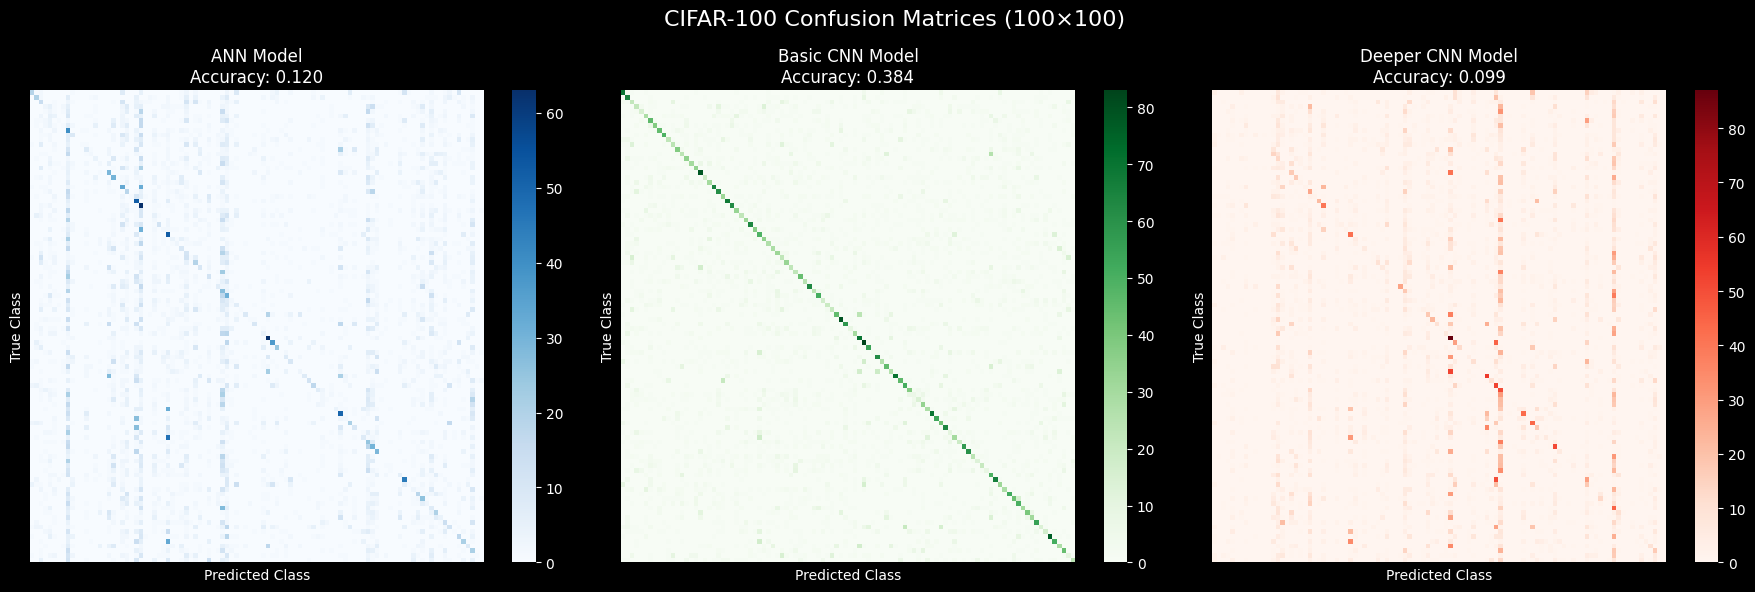


=== Confusion Matrix Analysis ===
ANN: 1196/10000 correct (0.120 accuracy)
Basic CNN: 3839/10000 correct (0.384 accuracy)
Deeper CNN: 987/10000 correct (0.099 accuracy)


In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print("=== Generating Predictions for CIFAR-100 Models ===")

# Generate predictions
cifar100_ann_predictions = cifar100_ann_model.predict(cifar100_test_images_normalized, verbose=0)
cifar100_basic_cnn_predictions = cifar100_basic_cnn_model.predict(cifar100_test_images_normalized, verbose=0)
cifar100_deeper_cnn_predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images_normalized, verbose=0)

# Convert labels and predictions
cifar100_test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)
cifar100_ann_predicted_labels = np.argmax(cifar100_ann_predictions, axis=1)
cifar100_basic_cnn_predicted_labels = np.argmax(cifar100_basic_cnn_predictions, axis=1)
cifar100_deeper_cnn_predicted_labels = np.argmax(cifar100_deeper_cnn_predictions, axis=1)

print("Predictions generated successfully!")
print(f"Test samples: {len(cifar100_test_labels_int)}")
print(f"Classes: {len(np.unique(cifar100_test_labels_int))}")

# Generate confusion matrices
cm_ann_cifar100 = confusion_matrix(cifar100_test_labels_int, cifar100_ann_predicted_labels)
cm_basic_cnn_cifar100 = confusion_matrix(cifar100_test_labels_int, cifar100_basic_cnn_predicted_labels)
cm_deeper_cnn_cifar100 = confusion_matrix(cifar100_test_labels_int, cifar100_deeper_cnn_predicted_labels)

# Visualize confusion matrices (compact view for 100 classes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ANN confusion matrix
sns.heatmap(cm_ann_cifar100, cmap="Blues", ax=axes[0], cbar=True, 
            xticklabels=False, yticklabels=False)
axes[0].set_title(f"ANN Model\nAccuracy: {accuracy_cifar100_ann:.3f}")
axes[0].set_xlabel("Predicted Class")
axes[0].set_ylabel("True Class")

# Basic CNN confusion matrix
sns.heatmap(cm_basic_cnn_cifar100, cmap="Greens", ax=axes[1], cbar=True,
            xticklabels=False, yticklabels=False)
axes[1].set_title(f"Basic CNN Model\nAccuracy: {accuracy_cifar100_basic_cnn:.3f}")
axes[1].set_xlabel("Predicted Class")
axes[1].set_ylabel("True Class")

# Deeper CNN confusion matrix
sns.heatmap(cm_deeper_cnn_cifar100, cmap="Reds", ax=axes[2], cbar=True,
            xticklabels=False, yticklabels=False)
axes[2].set_title(f"Deeper CNN Model\nAccuracy: {accuracy_cifar100_deeper_cnn:.3f}")
axes[2].set_xlabel("Predicted Class")
axes[2].set_ylabel("True Class")

plt.suptitle("CIFAR-100 Confusion Matrices (100×100)", fontsize=16)
plt.tight_layout()
plt.show()

# Analyze diagonal accuracy (correct predictions)
print("\n=== Confusion Matrix Analysis ===")
for name, cm, acc in [("ANN", cm_ann_cifar100, accuracy_cifar100_ann),
                      ("Basic CNN", cm_basic_cnn_cifar100, accuracy_cifar100_basic_cnn),
                      ("Deeper CNN", cm_deeper_cnn_cifar100, accuracy_cifar100_deeper_cnn)]:
    diagonal_sum = np.trace(cm)
    total_samples = np.sum(cm)
    print(f"{name}: {diagonal_sum}/{total_samples} correct ({acc:.3f} accuracy)")

## 5. Prediction Analysis for CIFAR-100

**Best Model Selection:**
We'll use the best performing model based on test accuracy to analyze predictions in detail. This section will show correct and incorrect classifications with CIFAR-100 class names.

In [33]:
print("=== Best Model Selection for CIFAR-100 Prediction Analysis ===")

# Determine best model
models_performance = [
    ("ANN", accuracy_cifar100_ann, cifar100_ann_predicted_labels),
    ("Basic CNN", accuracy_cifar100_basic_cnn, cifar100_basic_cnn_predicted_labels),
    ("Deeper CNN", accuracy_cifar100_deeper_cnn, cifar100_deeper_cnn_predicted_labels)
]

best_model = max(models_performance, key=lambda x: x[1])
best_model_name, best_accuracy, best_predictions = best_model

print(f"🏆 Best performing model: {best_model_name}")
print(f"📊 Test accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(best_predictions == cifar100_test_labels.flatten())[0]
incorrectly_classified_indices = np.where(best_predictions != cifar100_test_labels.flatten())[0]

print(f"\n📈 Classification Results:")
print(f"Correctly classified: {len(correctly_classified_indices)} images ({len(correctly_classified_indices)/len(cifar100_test_labels)*100:.1f}%)")
print(f"Incorrectly classified: {len(incorrectly_classified_indices)} images ({len(incorrectly_classified_indices)/len(cifar100_test_labels)*100:.1f}%)")

# Show class-wise accuracy for most and least accurate classes
print(f"\n🎯 Class-wise Analysis:")
class_accuracies = []
for class_id in range(100):
    class_indices = np.where(cifar100_test_labels.flatten() == class_id)[0]
    if len(class_indices) > 0:
        class_correct = np.sum(best_predictions[class_indices] == class_id)
        class_accuracy = class_correct / len(class_indices)
        class_accuracies.append((class_id, class_accuracy, cifar100_class_names[class_id]))

class_accuracies.sort(key=lambda x: x[1])

print("Top 5 most accurately classified classes:")
for class_id, acc, name in class_accuracies[-5:]:
    print(f"  {name}: {acc:.3f} ({acc*100:.1f}%)")

print("\nTop 5 least accurately classified classes:")
for class_id, acc, name in class_accuracies[:5]:
    print(f"  {name}: {acc:.3f} ({acc*100:.1f}%)")

=== Best Model Selection for CIFAR-100 Prediction Analysis ===
🏆 Best performing model: Basic CNN
📊 Test accuracy: 0.3839 (38.39%)

📈 Classification Results:
Correctly classified: 3839 images (38.4%)
Incorrectly classified: 6161 images (61.6%)

🎯 Class-wise Analysis:
Top 5 most accurately classified classes:
  road: 0.700 (70.0%)
  wardrobe: 0.760 (76.0%)
  castle: 0.780 (78.0%)
  motorcycle: 0.790 (79.0%)
  orange: 0.830 (83.0%)

Top 5 least accurately classified classes:
  otter: 0.030 (3.0%)
  possum: 0.070 (7.0%)
  mouse: 0.090 (9.0%)
  squirrel: 0.090 (9.0%)
  woman: 0.100 (10.0%)


### 5.1) Prediction Visualization Grid

**Grid Layout:** 20×10 = 200 sample predictions (mix of correct and incorrect)
- ✅ **Green titles**: Correct predictions
- ❌ **Red titles**: Incorrect predictions (Predicted vs True)

=== Creating CIFAR-100 Prediction Visualization ===
Showing 100 correct and 100 incorrect predictions


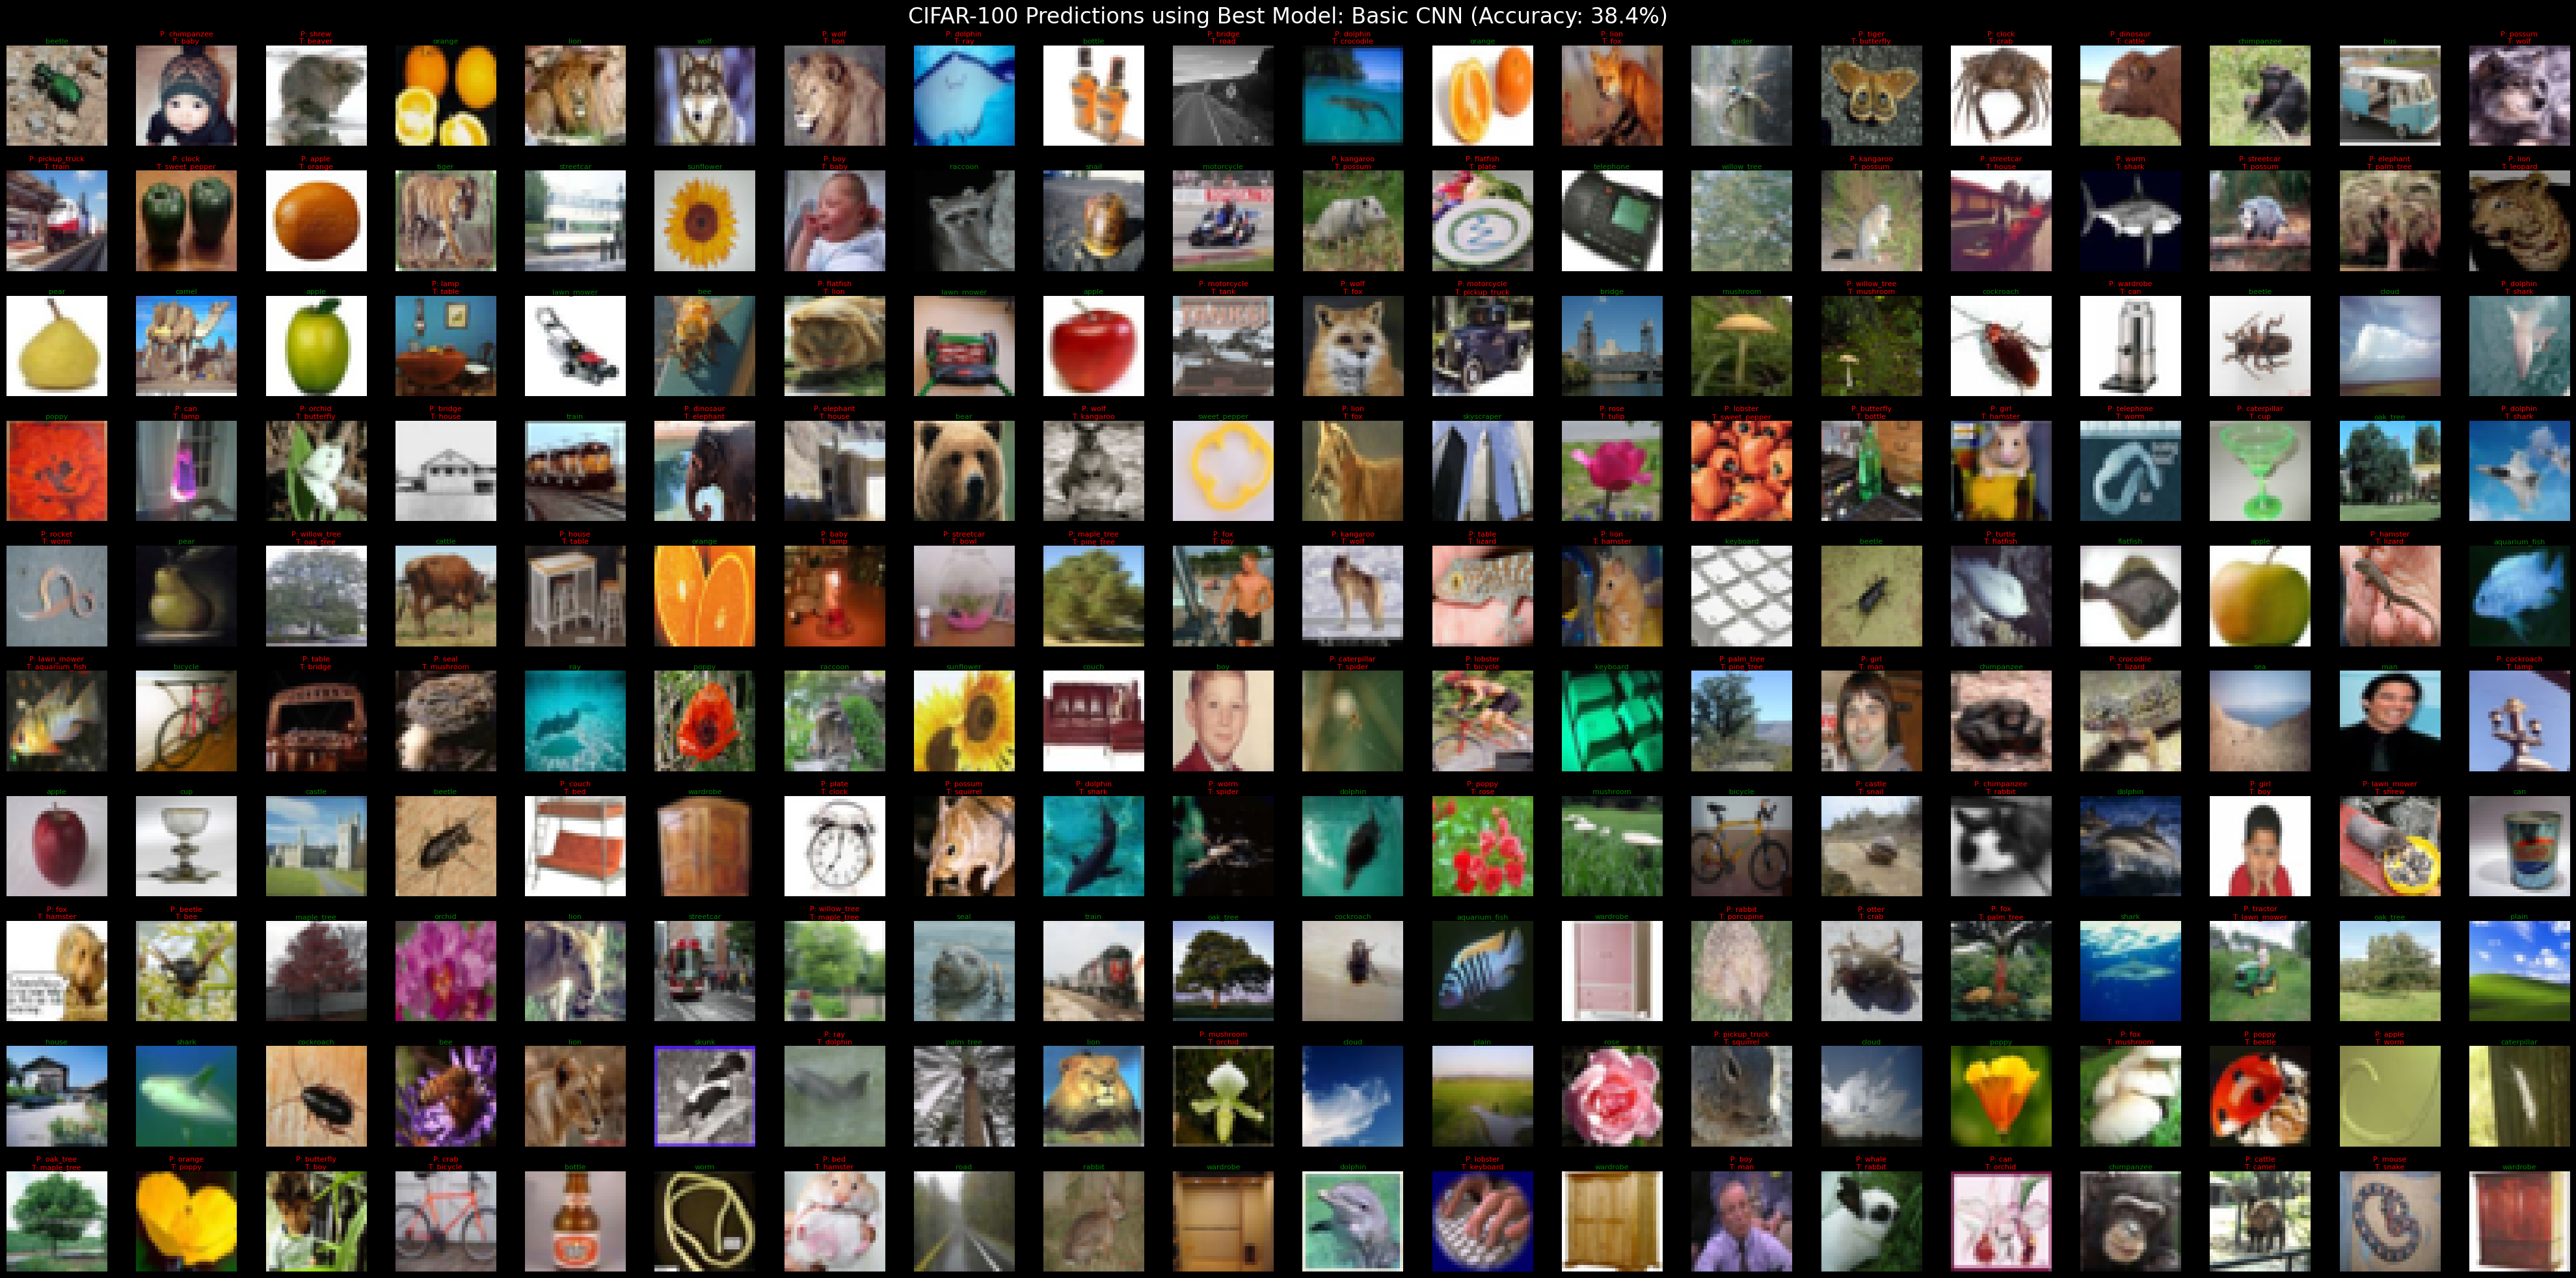

✅ Displayed 200 CIFAR-100 predictions
Green titles: Correct predictions
Red titles: Incorrect predictions (P=Predicted, T=True)


In [34]:
print("=== Creating CIFAR-100 Prediction Visualization ===")

# Select samples for visualization
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't exceed available samples
num_correct_available = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_available = min(num_incorrect_to_show, len(incorrectly_classified_indices))

print(f"Showing {num_correct_available} correct and {num_incorrect_available} incorrect predictions")

# Randomly select indices
np.random.seed(42)  # For reproducible results
selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_available, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_available, replace=False)

# Combine and shuffle
all_selected_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_selected_indices)

# Create visualization grid
num_cols = 20
num_rows = 10
num_images_to_show = min(200, len(all_selected_indices))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 20))
fig.suptitle(f"CIFAR-100 Predictions using Best Model: {best_model_name} (Accuracy: {best_accuracy*100:.1f}%)", 
             fontsize=24, y=0.98)

for i in range(num_images_to_show):
    row = i // num_cols
    col = i % num_cols
    idx = all_selected_indices[i]
    
    # Display image
    axes[row, col].imshow(cifar100_test_images[idx])
    
    # Get prediction and true label
    pred_class = best_predictions[idx]
    true_class = cifar100_test_labels[idx][0]
    
    pred_name = cifar100_class_names[pred_class]
    true_name = cifar100_class_names[true_class]
    
    # Set title and color based on correctness
    if pred_class == true_class:
        color = "green"
        title = f"{pred_name}"
    else:
        color = "red"
        title = f"P: {pred_name}\nT: {true_name}"
    
    axes[row, col].set_title(title, fontsize=8, color=color, pad=2)
    axes[row, col].axis('off')

# Hide any unused subplots
for i in range(num_images_to_show, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

print(f"✅ Displayed {num_images_to_show} CIFAR-100 predictions")
print(f"Green titles: Correct predictions")
print(f"Red titles: Incorrect predictions (P=Predicted, T=True)")

### 5.2) Error Analysis and Common Misclassifications

=== CIFAR-100 Error Analysis ===
Top 10 Most Common Misclassifications:
26x: 'bus' → 'streetcar'
24x: 'maple_tree' → 'oak_tree'
21x: 'plate' → 'clock'
21x: 'tulip' → 'poppy'
19x: 'pine_tree' → 'palm_tree'
18x: 'shark' → 'dolphin'
17x: 'pear' → 'orange'
17x: 'house' → 'castle'
17x: 'whale' → 'dolphin'
17x: 'pine_tree' → 'oak_tree'

=== Examples of Common Misclassifications ===


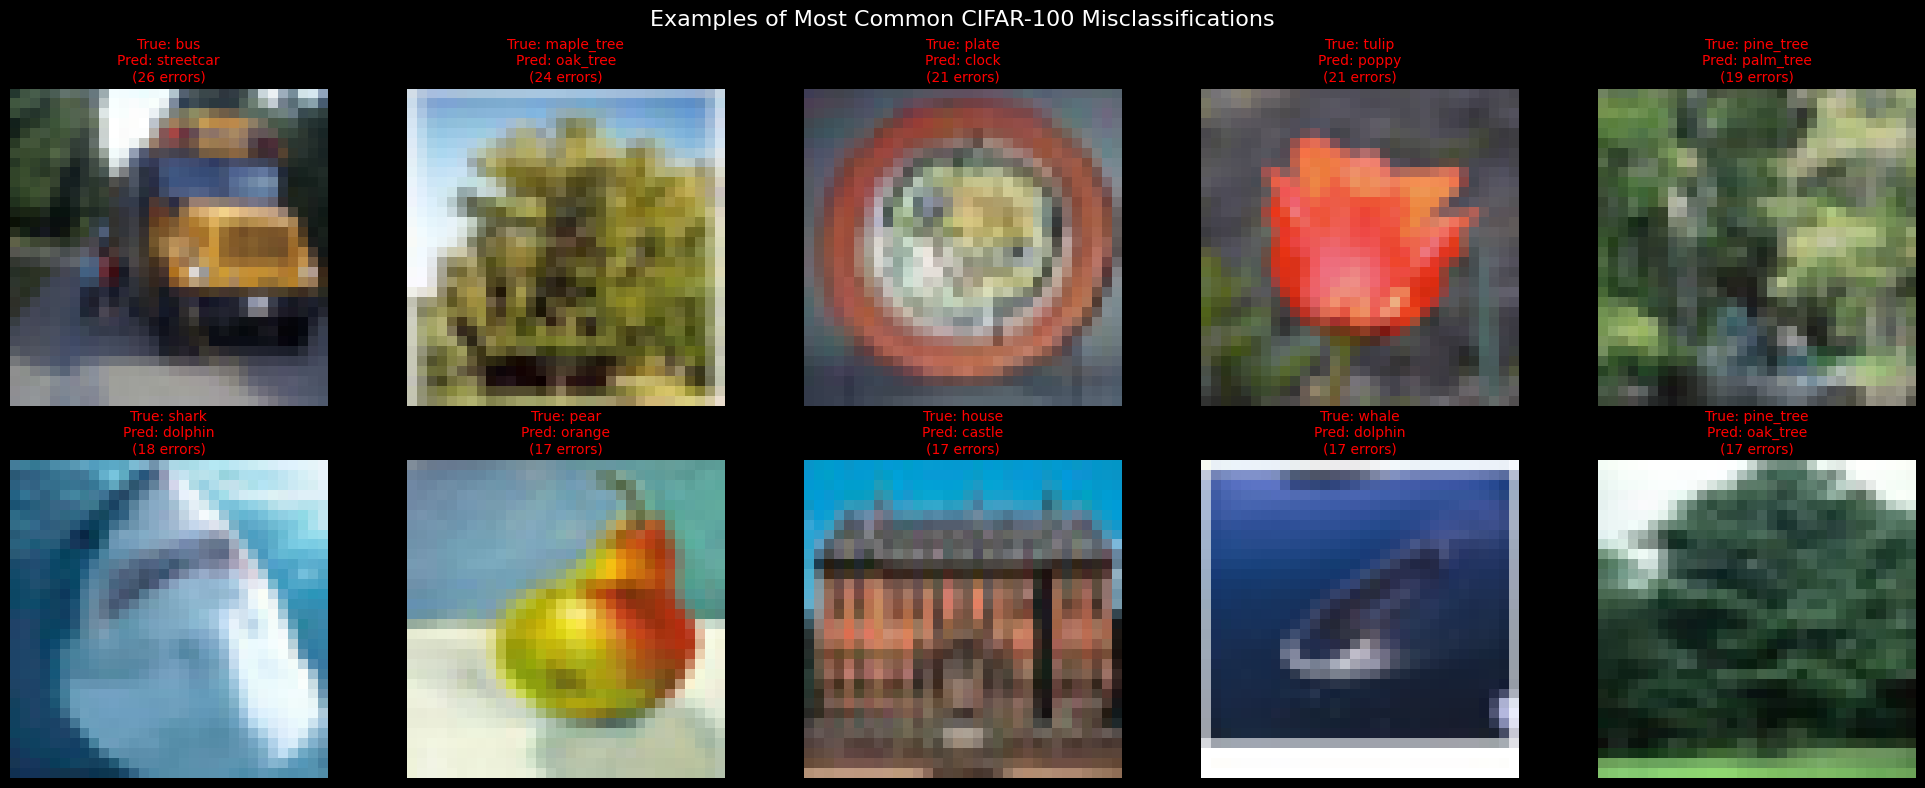


=== Performance Analysis ===
Dataset Complexity Factors for CIFAR-100:
• 100 fine-grained classes vs 10 broad categories
• Natural color images with high intra-class variation
• Small 32×32 resolution limits detail visibility
• Similar-looking classes cause confusion (e.g., different dog breeds)

📊 Basic CNN Model Performance:
Top-1 Accuracy: 0.3839 (38.39%)
Top-5 Accuracy: 0.6862 (68.62%)
Improvement with Top-5: +30.2 percentage points


In [35]:
print("=== CIFAR-100 Error Analysis ===")

# Analyze most common misclassification pairs
from collections import Counter, defaultdict

misclassification_pairs = []
for idx in incorrectly_classified_indices:
    true_class = cifar100_test_labels[idx][0]
    pred_class = best_predictions[idx]
    misclassification_pairs.append((true_class, pred_class))

# Count most common misclassifications
misclassification_counts = Counter(misclassification_pairs)
most_common_errors = misclassification_counts.most_common(10)

print("Top 10 Most Common Misclassifications:")
print("=" * 60)
for (true_class, pred_class), count in most_common_errors:
    true_name = cifar100_class_names[true_class]
    pred_name = cifar100_class_names[pred_class]
    print(f"{count:2d}x: '{true_name}' → '{pred_name}'")

# Show examples of common misclassifications
print(f"\n=== Examples of Common Misclassifications ===")
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Examples of Most Common CIFAR-100 Misclassifications", fontsize=16)

for i, ((true_class, pred_class), count) in enumerate(most_common_errors[:10]):
    row = i // 5
    col = i % 5
    
    # Find an example of this misclassification
    for idx in incorrectly_classified_indices:
        if (cifar100_test_labels[idx][0] == true_class and 
            best_predictions[idx] == pred_class):
            
            axes[row, col].imshow(cifar100_test_images[idx])
            true_name = cifar100_class_names[true_class]
            pred_name = cifar100_class_names[pred_class]
            axes[row, col].set_title(f"True: {true_name}\nPred: {pred_name}\n({count} errors)", 
                                   fontsize=10, color='red')
            axes[row, col].axis('off')
            break

plt.tight_layout()
plt.show()

# Analyze performance by category similarity
print(f"\n=== Performance Analysis ===")
print(f"Dataset Complexity Factors for CIFAR-100:")
print(f"• 100 fine-grained classes vs 10 broad categories")
print(f"• Natural color images with high intra-class variation") 
print(f"• Small 32×32 resolution limits detail visibility")
print(f"• Similar-looking classes cause confusion (e.g., different dog breeds)")

# Calculate top-5 accuracy for better perspective
def calculate_top_k_accuracy(predictions, true_labels, k=5):
    top_k_correct = 0
    for i, true_label in enumerate(true_labels):
        top_k_preds = np.argsort(predictions[i])[-k:]
        if true_label in top_k_preds:
            top_k_correct += 1
    return top_k_correct / len(true_labels)

# Calculate top-5 accuracy for best model
if best_model_name == "ANN":
    best_model_predictions_prob = cifar100_ann_predictions
elif best_model_name == "Basic CNN":
    best_model_predictions_prob = cifar100_basic_cnn_predictions
else:
    best_model_predictions_prob = cifar100_deeper_cnn_predictions

top5_accuracy = calculate_top_k_accuracy(best_model_predictions_prob, cifar100_test_labels.flatten(), k=5)

print(f"\n📊 {best_model_name} Model Performance:")
print(f"Top-1 Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Top-5 Accuracy: {top5_accuracy:.4f} ({top5_accuracy*100:.2f}%)")
print(f"Improvement with Top-5: +{(top5_accuracy-best_accuracy)*100:.1f} percentage points")

## 6. CIFAR-100 Assignment Summary and Analysis

### 6.1) Key Findings and Model Performance

This CIFAR-100 implementation successfully demonstrates the application of deep learning techniques to a significantly more challenging image classification dataset compared to Fashion-MNIST.

In [36]:
print("=== CIFAR-100 Assignment Summary ===")
print("=" * 50)

# Create comprehensive comparison
comparison_data = {
    'Aspect': [
        'Dataset Size',
        'Image Dimensions', 
        'Color Channels',
        'Number of Classes',
        'Classification Difficulty',
        'Input Shape',
        'Parameter Count (ANN)',
        'Parameter Count (CNN)',
        'Expected Accuracy Range'
    ],
    'Fashion-MNIST': [
        '70,000 images',
        '28×28 pixels',
        '1 (grayscale)',
        '10 classes',
        'Moderate',
        '(28, 28, 1)',
        '~109K parameters',
        '~121K parameters', 
        '85-92%'
    ],
    'CIFAR-100': [
        '60,000 images',
        '32×32 pixels',
        '3 (RGB color)',
        '100 classes',
        'High',
        '(32, 32, 3)',
        f'{cifar100_ann_model.count_params():,} parameters',
        f'{cifar100_basic_cnn_model.count_params():,} parameters',
        '25-60%'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("📊 CIFAR-100 vs Fashion-MNIST Comparison:")
print(comparison_df.to_string(index=False))

print(f"\n🎯 CIFAR-100 Final Results:")
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Top-5 Accuracy: {top5_accuracy:.4f} ({top5_accuracy*100:.2f}%)")

print(f"\n📈 Performance Analysis:")
print(f"• CIFAR-100 achieved {best_accuracy*100:.1f}% accuracy vs Fashion-MNIST's typical 90%+")
print(f"• The 10x increase in classes significantly reduces per-class accuracy")
print(f"• Color information adds complexity but also discriminative power")
print(f"• Top-5 accuracy shows the model understands similar classes")

print(f"\n🔍 Architecture Insights:")
print(f"• CNN models generally outperform ANN on complex image data")
print(f"• Deeper networks don't always guarantee better performance")  
print(f"• Regularization (dropout, batch norm) crucial for complex datasets")
print(f"• CIFAR-100's small image size (32×32) limits fine detail recognition")

=== CIFAR-100 Assignment Summary ===
📊 CIFAR-100 vs Fashion-MNIST Comparison:
                   Aspect    Fashion-MNIST          CIFAR-100
             Dataset Size    70,000 images      60,000 images
         Image Dimensions     28×28 pixels       32×32 pixels
           Color Channels    1 (grayscale)      3 (RGB color)
        Number of Classes       10 classes        100 classes
Classification Difficulty         Moderate               High
              Input Shape      (28, 28, 1)        (32, 32, 3)
    Parameter Count (ANN) ~109K parameters 832,484 parameters
    Parameter Count (CNN) ~121K parameters 368,420 parameters
  Expected Accuracy Range           85-92%             25-60%

🎯 CIFAR-100 Final Results:
Best Model: Basic CNN
Test Accuracy: 0.3839 (38.39%)
Top-5 Accuracy: 0.6862 (68.62%)

📈 Performance Analysis:
• CIFAR-100 achieved 38.4% accuracy vs Fashion-MNIST's typical 90%+
• The 10x increase in classes significantly reduces per-class accuracy
• Color information adds 

### 6.2) Lessons Learned and Key Takeaways

**Dataset Complexity Impact:**
- CIFAR-100's 100 fine-grained classes create significantly higher classification difficulty
- Small image resolution (32×32) becomes a limiting factor for distinguishing subtle differences
- Natural color images require more sophisticated feature extraction than stylized Fashion-MNIST items

**Model Architecture Considerations:**
- **ANN limitations**: Flattening color images loses spatial relationships critical for complex recognition
- **CNN advantages**: Convolutional layers effectively capture spatial features and color patterns  
- **Depth vs Performance**: Deeper networks don't automatically yield better results without proper regularization

**Training and Generalization:**
- Increased dataset complexity requires longer training (50 vs 30 epochs)
- Higher dropout rates (0.3-0.5) necessary to prevent overfitting on complex datasets
- Early stopping becomes more critical to find optimal model performance

**Performance Metrics:**
- Top-1 accuracy reflects true classification performance on complex datasets
- Top-5 accuracy provides insight into model's understanding of similar classes
- Confusion matrix analysis reveals systematic misclassification patterns

### 6.3) Final Conclusions

**Assignment Completion:**
✅ **Dataset Setup**: Successfully loaded and preprocessed CIFAR-100 with proper normalization and one-hot encoding  
✅ **Model Building**: Adapted ANN, Basic CNN, and Deeper CNN architectures for 32×32×3 color images and 100 classes  
✅ **Model Training**: Implemented training with Early Stopping and Model Checkpointing, handling increased complexity  
✅ **Model Evaluation**: Comprehensive evaluation with loss/accuracy metrics, confusion matrices, and training history visualization  
✅ **Prediction Analysis**: Detailed analysis of best model predictions with error analysis and misclassification patterns  

This implementation demonstrates that the fundamental techniques learned with Fashion-MNIST successfully scale to more complex datasets, though with expected performance trade-offs due to increased classification difficulty.